In [4]:
import pandas as pd
import numpy as np
import datetime
import warnings

In [53]:
warnings.filterwarnings(action='ignore')

In [6]:
df = pd.read_csv("./data/seoul_coffee_ver06.csv", encoding='cp949')
df

,인허가일자,영업상태코드,폐업일자,소재지면적,지번주소,사업장명,업태구분명,long,lat,franchise
0,20200713,1,0.0,329.89,서울특별시 송파구 방이동 44-3 현대토픽스,스타벅스 몽촌토성역점,커피숍,127.113106,37.516942,1.0
1,20200707,0,20200712.0,NaN,서울특별시 강남구 삼성동 159 코엑스,빈스빈스경기도미술관점(세븐스에비뉴),커피숍,127.058819,37.512521,1.0
2,20200714,1,0.0,107.78,서울특별시 서초구 양재동 273-2 1층,이디야 포이점,커피숍,127.044560,37.475653,0.0
3,20200714,1,0.0,367.62,서울특별시 중구 저동2가 88-5,투썸플레이스,커피숍,126.988639,37.564466,1.0
4,20200714,1,0.0,130.00,서울특별시 노원구 상계동 1118-38 한올빌딩,할리스커피 수락산역점,커피숍,127.054843,37.676224,1.0
...,...,...,...,...,...,...,...,...,...,...
47232,20100531,0,20180418.0,15.70,서울특별시송파구문정동516,카페 바쿠스,기타 휴게음식점,127.124998,37.477578,2.0
47233,20110624,0,20140414.0,33.20,서울특별시송파구문정동292,키즈카페 애플트리,기타 휴게음식점,127.119370,37.478232,2.0
47234,20110401,0,20200731.0,66.00,서울특별시송파구문정동516-0,카페 0 (young),기타 휴게음식점,127.120493,37.485106,2.0
47235,20190503,0,20200803.0,52.67,서울특별시용산구효창동13-2,카페 다(Cafe DA),기타 휴게음식점,126.963058,37.539195,2.0


## 폐업일자 0 으로 설정된 일자를 20211231 프로젝트 종료일자로 임의로 설정
- 향후 (폐업일-인허가일자)영업일 계산으로 분류를 하기위한 목적
- 2년 이상/이하를 기준으로 영업중인 카페와 폐업한 카페로 총 4 단계로 분류하기 위함.
- 시계열 데이터에서 1980년 이전 데이터를 삭제하기 위함.

In [7]:
for i in (df[df['폐업일자'] == 0]).index:
    df.loc[i, '폐업일자'] = 20211231
df

,인허가일자,영업상태코드,폐업일자,소재지면적,지번주소,사업장명,업태구분명,long,lat,franchise
0,20200713,1,20211231.0,329.89,서울특별시 송파구 방이동 44-3 현대토픽스,스타벅스 몽촌토성역점,커피숍,127.113106,37.516942,1.0
1,20200707,0,20200712.0,NaN,서울특별시 강남구 삼성동 159 코엑스,빈스빈스경기도미술관점(세븐스에비뉴),커피숍,127.058819,37.512521,1.0
2,20200714,1,20211231.0,107.78,서울특별시 서초구 양재동 273-2 1층,이디야 포이점,커피숍,127.044560,37.475653,0.0
3,20200714,1,20211231.0,367.62,서울특별시 중구 저동2가 88-5,투썸플레이스,커피숍,126.988639,37.564466,1.0
4,20200714,1,20211231.0,130.00,서울특별시 노원구 상계동 1118-38 한올빌딩,할리스커피 수락산역점,커피숍,127.054843,37.676224,1.0
...,...,...,...,...,...,...,...,...,...,...
47232,20100531,0,20180418.0,15.70,서울특별시송파구문정동516,카페 바쿠스,기타 휴게음식점,127.124998,37.477578,2.0
47233,20110624,0,20140414.0,33.20,서울특별시송파구문정동292,키즈카페 애플트리,기타 휴게음식점,127.119370,37.478232,2.0
47234,20110401,0,20200731.0,66.00,서울특별시송파구문정동516-0,카페 0 (young),기타 휴게음식점,127.120493,37.485106,2.0
47235,20190503,0,20200803.0,52.67,서울특별시용산구효창동13-2,카페 다(Cafe DA),기타 휴게음식점,126.963058,37.539195,2.0


In [8]:
df['폐업일자'] = df['폐업일자'].astype(int)

In [9]:
df1 = df.copy()

In [10]:
df1.drop(['소재지면적','지번주소','업태구분명'],  axis=1, inplace=True)
df1

,인허가일자,영업상태코드,폐업일자,사업장명,long,lat,franchise
0,20200713,1,20211231,스타벅스 몽촌토성역점,127.113106,37.516942,1.0
1,20200707,0,20200712,빈스빈스경기도미술관점(세븐스에비뉴),127.058819,37.512521,1.0
2,20200714,1,20211231,이디야 포이점,127.044560,37.475653,0.0
3,20200714,1,20211231,투썸플레이스,126.988639,37.564466,1.0
4,20200714,1,20211231,할리스커피 수락산역점,127.054843,37.676224,1.0
...,...,...,...,...,...,...,...
47232,20100531,0,20180418,카페 바쿠스,127.124998,37.477578,2.0
47233,20110624,0,20140414,키즈카페 애플트리,127.119370,37.478232,2.0
47234,20110401,0,20200731,카페 0 (young),127.120493,37.485106,2.0
47235,20190503,0,20200803,카페 다(Cafe DA),126.963058,37.539195,2.0


In [11]:
df1['폐업일자'].sort_values()

28301    11111111
37684    13300310
38008    18991230
40121    18991230
40884    18991230
           ...   
17918    20211231
17917    20211231
17916    20211231
17932    20211231
0        20211231
Name: 폐업일자, Length: 47237, dtype: int32

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47237 entries, 0 to 47236
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   인허가일자      47237 non-null  int64  
 1   영업상태코드     47237 non-null  int64  
 2   폐업일자       47237 non-null  int32  
 3   사업장명       47237 non-null  object 
 4   long       47237 non-null  float64
 5   lat        47237 non-null  float64
 6   franchise  47237 non-null  float64
dtypes: float64(3), int32(1), int64(2), object(1)
memory usage: 2.3+ MB


## 시계열에 표현할 1980년 이후의 데이터만 뽑아내고 이전 데이터는 삭제

In [13]:
df2 = df1[df1['인허가일자'] >= 19800000]
df2

,인허가일자,영업상태코드,폐업일자,사업장명,long,lat,franchise
0,20200713,1,20211231,스타벅스 몽촌토성역점,127.113106,37.516942,1.0
1,20200707,0,20200712,빈스빈스경기도미술관점(세븐스에비뉴),127.058819,37.512521,1.0
2,20200714,1,20211231,이디야 포이점,127.044560,37.475653,0.0
3,20200714,1,20211231,투썸플레이스,126.988639,37.564466,1.0
4,20200714,1,20211231,할리스커피 수락산역점,127.054843,37.676224,1.0
...,...,...,...,...,...,...,...
47232,20100531,0,20180418,카페 바쿠스,127.124998,37.477578,2.0
47233,20110624,0,20140414,키즈카페 애플트리,127.119370,37.478232,2.0
47234,20110401,0,20200731,카페 0 (young),127.120493,37.485106,2.0
47235,20190503,0,20200803,카페 다(Cafe DA),126.963058,37.539195,2.0


In [14]:
df2['폐업일자'].sort_values()

28301    11111111
37684    13300310
41127    18991230
38379    18991230
39877    18991230
           ...   
17587    20211231
17585    20211231
17584    20211231
17606    20211231
0        20211231
Name: 폐업일자, Length: 45786, dtype: int32

In [15]:
df3 = df2[df2['폐업일자'] >= 19800000]
df3

,인허가일자,영업상태코드,폐업일자,사업장명,long,lat,franchise
0,20200713,1,20211231,스타벅스 몽촌토성역점,127.113106,37.516942,1.0
1,20200707,0,20200712,빈스빈스경기도미술관점(세븐스에비뉴),127.058819,37.512521,1.0
2,20200714,1,20211231,이디야 포이점,127.044560,37.475653,0.0
3,20200714,1,20211231,투썸플레이스,126.988639,37.564466,1.0
4,20200714,1,20211231,할리스커피 수락산역점,127.054843,37.676224,1.0
...,...,...,...,...,...,...,...
47232,20100531,0,20180418,카페 바쿠스,127.124998,37.477578,2.0
47233,20110624,0,20140414,키즈카페 애플트리,127.119370,37.478232,2.0
47234,20110401,0,20200731,카페 0 (young),127.120493,37.485106,2.0
47235,20190503,0,20200803,카페 다(Cafe DA),126.963058,37.539195,2.0


## (인허가일자, 폐업일자) datetime 형태로 format 변경
- 그래프에 표현하기 위해 날짜 전처리 작업
- 필요하는 않은 컬럼에 대한 삭제

In [16]:
df3['인허가일자'] = pd.to_datetime(df3['인허가일자'], format='%Y%m%d')
df3['폐업일자'] = pd.to_datetime(df3['폐업일자'], format='%Y%m%d')
df3

,인허가일자,영업상태코드,폐업일자,사업장명,long,lat,franchise
0,2020-07-13,1,2021-12-31,스타벅스 몽촌토성역점,127.113106,37.516942,1.0
1,2020-07-07,0,2020-07-12,빈스빈스경기도미술관점(세븐스에비뉴),127.058819,37.512521,1.0
2,2020-07-14,1,2021-12-31,이디야 포이점,127.044560,37.475653,0.0
3,2020-07-14,1,2021-12-31,투썸플레이스,126.988639,37.564466,1.0
4,2020-07-14,1,2021-12-31,할리스커피 수락산역점,127.054843,37.676224,1.0
...,...,...,...,...,...,...,...
47232,2010-05-31,0,2018-04-18,카페 바쿠스,127.124998,37.477578,2.0
47233,2011-06-24,0,2014-04-14,키즈카페 애플트리,127.119370,37.478232,2.0
47234,2011-04-01,0,2020-07-31,카페 0 (young),127.120493,37.485106,2.0
47235,2019-05-03,0,2020-08-03,카페 다(Cafe DA),126.963058,37.539195,2.0


In [17]:
df3['in_month']=df3['인허가일자'].dt.month
df3['in_year']=df3['인허가일자'].dt.year
df3['out_month']=df3['폐업일자'].dt.month
df3['out_year']=df3['폐업일자'].dt.year
df3

,인허가일자,영업상태코드,폐업일자,사업장명,long,lat,franchise,in_month,in_year,out_month,out_year
0,2020-07-13,1,2021-12-31,스타벅스 몽촌토성역점,127.113106,37.516942,1.0,7,2020,12,2021
1,2020-07-07,0,2020-07-12,빈스빈스경기도미술관점(세븐스에비뉴),127.058819,37.512521,1.0,7,2020,7,2020
2,2020-07-14,1,2021-12-31,이디야 포이점,127.044560,37.475653,0.0,7,2020,12,2021
3,2020-07-14,1,2021-12-31,투썸플레이스,126.988639,37.564466,1.0,7,2020,12,2021
4,2020-07-14,1,2021-12-31,할리스커피 수락산역점,127.054843,37.676224,1.0,7,2020,12,2021
...,...,...,...,...,...,...,...,...,...,...,...
47232,2010-05-31,0,2018-04-18,카페 바쿠스,127.124998,37.477578,2.0,5,2010,4,2018
47233,2011-06-24,0,2014-04-14,키즈카페 애플트리,127.119370,37.478232,2.0,6,2011,4,2014
47234,2011-04-01,0,2020-07-31,카페 0 (young),127.120493,37.485106,2.0,4,2011,7,2020
47235,2019-05-03,0,2020-08-03,카페 다(Cafe DA),126.963058,37.539195,2.0,5,2019,8,2020


In [18]:
df3['in_count'] = 1
df3['out_count'] = 1
df3

,인허가일자,영업상태코드,폐업일자,사업장명,long,lat,franchise,in_month,in_year,out_month,out_year,in_count,out_count
0,2020-07-13,1,2021-12-31,스타벅스 몽촌토성역점,127.113106,37.516942,1.0,7,2020,12,2021,1,1
1,2020-07-07,0,2020-07-12,빈스빈스경기도미술관점(세븐스에비뉴),127.058819,37.512521,1.0,7,2020,7,2020,1,1
2,2020-07-14,1,2021-12-31,이디야 포이점,127.044560,37.475653,0.0,7,2020,12,2021,1,1
3,2020-07-14,1,2021-12-31,투썸플레이스,126.988639,37.564466,1.0,7,2020,12,2021,1,1
4,2020-07-14,1,2021-12-31,할리스커피 수락산역점,127.054843,37.676224,1.0,7,2020,12,2021,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47232,2010-05-31,0,2018-04-18,카페 바쿠스,127.124998,37.477578,2.0,5,2010,4,2018,1,1
47233,2011-06-24,0,2014-04-14,키즈카페 애플트리,127.119370,37.478232,2.0,6,2011,4,2014,1,1
47234,2011-04-01,0,2020-07-31,카페 0 (young),127.120493,37.485106,2.0,4,2011,7,2020,1,1
47235,2019-05-03,0,2020-08-03,카페 다(Cafe DA),126.963058,37.539195,2.0,5,2019,8,2020,1,1


In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45747 entries, 0 to 47236
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   인허가일자      45747 non-null  datetime64[ns]
 1   영업상태코드     45747 non-null  int64         
 2   폐업일자       45747 non-null  datetime64[ns]
 3   사업장명       45747 non-null  object        
 4   long       45747 non-null  float64       
 5   lat        45747 non-null  float64       
 6   franchise  45747 non-null  float64       
 7   in_month   45747 non-null  int64         
 8   in_year    45747 non-null  int64         
 9   out_month  45747 non-null  int64         
 10  out_year   45747 non-null  int64         
 11  in_count   45747 non-null  int64         
 12  out_count  45747 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int64(7), object(1)
memory usage: 4.9+ MB


In [20]:
df3.drop(['인허가일자','영업상태코드','폐업일자','사업장명','long','lat','franchise'], axis=1, inplace=True)
df3

,in_month,in_year,out_month,out_year,in_count,out_count
0,7,2020,12,2021,1,1
1,7,2020,7,2020,1,1
2,7,2020,12,2021,1,1
3,7,2020,12,2021,1,1
4,7,2020,12,2021,1,1
...,...,...,...,...,...,...
47232,5,2010,4,2018,1,1
47233,6,2011,4,2014,1,1
47234,4,2011,7,2020,1,1
47235,5,2019,8,2020,1,1


In [21]:
df_in = df3.groupby(['in_year', 'in_month'])['in_count'].sum()
df_out = df3.groupby(['out_year', 'out_month'])['out_count'].sum()

In [22]:
df4 = pd.DataFrame(df_in)
df5 = pd.DataFrame(df_out)
df = pd.concat([df4, df5], axis=1)
df

in_count  out_count
1980 1         14        NaN
     2         14        1.0
     3         12        NaN
     4         26        NaN
     5         16        NaN
...           ...        ...
2021 8        256      139.0
     9        194      143.0
     10       225      167.0
     11       212      137.0
     12        45    15914.0

[504 rows x 2 columns]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 504 entries, (1980, 1) to (2021, 12)
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   in_count   504 non-null    int64  
 1   out_count  433 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 10.7 KB


In [24]:
df = df.reset_index()
df

,level_0,level_1,in_count,out_count
0,1980,1,14,NaN
1,1980,2,14,1.0
2,1980,3,12,NaN
3,1980,4,26,NaN
4,1980,5,16,NaN
...,...,...,...,...
499,2021,8,256,139.0
500,2021,9,194,143.0
501,2021,10,225,167.0
502,2021,11,212,137.0


In [25]:
df.rename(columns = {"level_0": "year","level_1": "month"}, inplace = True)
df

,year,month,in_count,out_count
0,1980,1,14,NaN
1,1980,2,14,1.0
2,1980,3,12,NaN
3,1980,4,26,NaN
4,1980,5,16,NaN
...,...,...,...,...
499,2021,8,256,139.0
500,2021,9,194,143.0
501,2021,10,225,167.0
502,2021,11,212,137.0


## 오픈(df_in) / 폐업(df_out) 데이터프레임 분리 및 데이터 정리
### df_in
- 2021년 12월 데이터 삭제 (한달간의 전체 데이터가 아니기 때문)
### df_out
- 1988년 5월 이전 데이터 삭제(out_count 에 결측치로 인한 rows 삭제)
- 2021년 12월 데이터 삭제 (한달간의 전체 데이터가 아니기 때문)

In [26]:
cols = ['year','month']
df['date'] =df[cols].apply(lambda x: ''.join(x.values.astype(str)), axis=1)
df

,year,month,in_count,out_count,date
0,1980,1,14,NaN,19801
1,1980,2,14,1.0,19802
2,1980,3,12,NaN,19803
3,1980,4,26,NaN,19804
4,1980,5,16,NaN,19805
...,...,...,...,...,...
499,2021,8,256,139.0,20218
500,2021,9,194,143.0,20219
501,2021,10,225,167.0,202110
502,2021,11,212,137.0,202111


In [27]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m')
df

,year,month,in_count,out_count,date
0,1980,1,14,NaN,1980-01-01
1,1980,2,14,1.0,1980-02-01
2,1980,3,12,NaN,1980-03-01
3,1980,4,26,NaN,1980-04-01
4,1980,5,16,NaN,1980-05-01
...,...,...,...,...,...
499,2021,8,256,139.0,2021-08-01
500,2021,9,194,143.0,2021-09-01
501,2021,10,225,167.0,2021-10-01
502,2021,11,212,137.0,2021-11-01


In [28]:
a = df[(df['year'] == 1988) & (df['month'] == 5)].index
a

Int64Index([100], dtype='int64')

In [29]:
df.drop(['year','month'], axis=1, inplace=True)
df

,in_count,out_count,date
0,14,NaN,1980-01-01
1,14,1.0,1980-02-01
2,12,NaN,1980-03-01
3,26,NaN,1980-04-01
4,16,NaN,1980-05-01
...,...,...,...
499,256,139.0,2021-08-01
500,194,143.0,2021-09-01
501,225,167.0,2021-10-01
502,212,137.0,2021-11-01


In [30]:
df_in = df.copy()
df_out = df.copy()

In [31]:
df_in.drop(['out_count'], axis=1, inplace=True)
df_out.drop(['in_count'], axis=1, inplace=True)

In [32]:
a = (df_out.iloc[:100]).index
df_out.drop(a, axis=0, inplace=True)
df_out

,out_count,date
100,3.0,1988-05-01
101,2.0,1988-06-01
102,3.0,1988-07-01
103,2.0,1988-08-01
104,1.0,1988-09-01
...,...,...
499,139.0,2021-08-01
500,143.0,2021-09-01
501,167.0,2021-10-01
502,137.0,2021-11-01


In [33]:
df_in = df_in.set_index(['date'])
df_in

,in_count
date,
1980-01-01,14
1980-02-01,14
1980-03-01,12
1980-04-01,26
1980-05-01,16
...,...
2021-08-01,256
2021-09-01,194
2021-10-01,225


In [34]:
df_out = df_out.set_index(['date'])
df_out

,out_count
date,
1988-05-01,3.0
1988-06-01,2.0
1988-07-01,3.0
1988-08-01,2.0
1988-09-01,1.0
...,...
2021-08-01,139.0
2021-09-01,143.0
2021-10-01,167.0


In [35]:
df_in.drop(['2021-12-01'], axis=0, inplace=True)
df_in

,in_count
date,
1980-01-01,14
1980-02-01,14
1980-03-01,12
1980-04-01,26
1980-05-01,16
...,...
2021-07-01,240
2021-08-01,256
2021-09-01,194


In [36]:
df_out.drop(['2021-12-01'], axis=0, inplace=True)
df_out

,out_count
date,
1988-05-01,3.0
1988-06-01,2.0
1988-07-01,3.0
1988-08-01,2.0
1988-09-01,1.0
...,...
2021-07-01,179.0
2021-08-01,139.0
2021-09-01,143.0


## 오픈/ 폐업 데이터 예측 (3년)

In [37]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
plt.style.use('fivethirtyeight')
%matplotlib inline

In [38]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and d triplets
seasonal_pdq = [ (x[0], x[1], x[2], 12)  for x in pdq ]

print('Example of parameter combinations for Seasonal ARIMA ...')
print('SARIMAX:  {} x {}'.format(pdq[1], seasonal_pdq[1]) )
print('SARIMAX:  {} x {}'.format(pdq[1], seasonal_pdq[2]) )
print('SARIMAX:  {} x {}'.format(pdq[2], seasonal_pdq[3]) )
print('SARIMAX:  {} x {}'.format(pdq[2], seasonal_pdq[4]) )

Example of parameter combinations for Seasonal ARIMA ...
SARIMAX:  (0, 0, 1) x (0, 0, 1, 12)
SARIMAX:  (0, 0, 1) x (0, 1, 0, 12)
SARIMAX:  (0, 1, 0) x (0, 1, 1, 12)
SARIMAX:  (0, 1, 0) x (1, 0, 0, 12)


### df_in 에 최적의 parameter 값 찾기

In [39]:
select_candi = 10000000
param_candi = ( 0, 0, 0 )
param_seasonal_candi = ( 0, 0, 0)

count=0
end_count = len(pdq)

for param in pdq:   
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX( df_in['in_count'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False
                                           )
            results = mod.fit()
            count += 1
            if count <= 5:
                print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            if results.aic < select_candi:
                select_candi = results.aic
                param_candi = param
                param_seasonal_candi = param_seasonal
        except:
            continue
            
print(param_candi, param_seasonal_candi, select_candi)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:6203.475414850978


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:5589.962521328322
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4779.70224154938


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4651.0769004647
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4790.896231828328


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

(1, 1, 1) (0, 1, 1, 12) 4146.588712268288


In [40]:
mod = sm.tsa.statespace.SARIMAX(
    df_in['in_count'],
    order=(1, 1, 1),
    seasonal_order=(0, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = mod.fit()

print(results.summary())

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                           in_count   No. Observations:                  503
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2069.294
Date:                            Fri, 31 Dec 2021   AIC                           4146.589
Time:                                    12:44:07   BIC                           4163.250
Sample:                                01-01-1980   HQIC                          4153.140
                                     - 11-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1788      0.064      2.791      0.005       0.053       0.304
ma.L1         -0.6550      0.047   

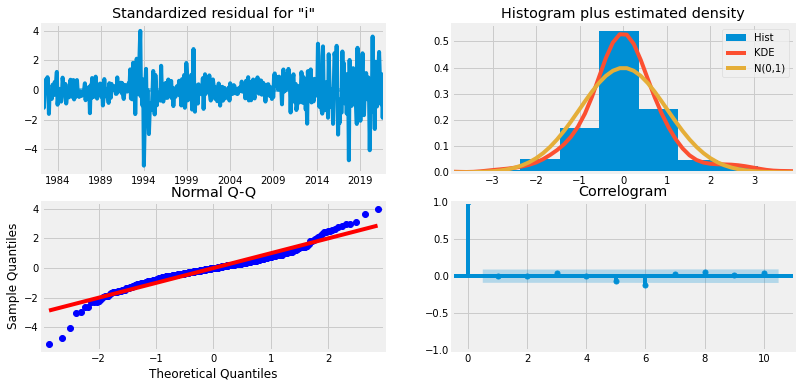

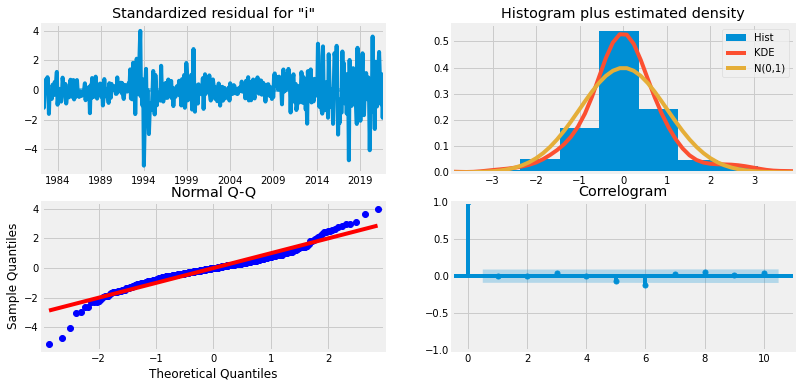

In [41]:
results.plot_diagnostics(figsize=(12,6))

### get_prediction(dynamic=False)  - df_in
- 예측 데이터와 실제 데이터와의 비교 그래프
- 2015년 1월 이후부터 예측
- 1980년 부터 데이터부터 관측

In [46]:
pred = results.get_prediction(
    start=pd.to_datetime('2015-01-01'),
    dynamic=False
)

pred_ci = pred.conf_int()

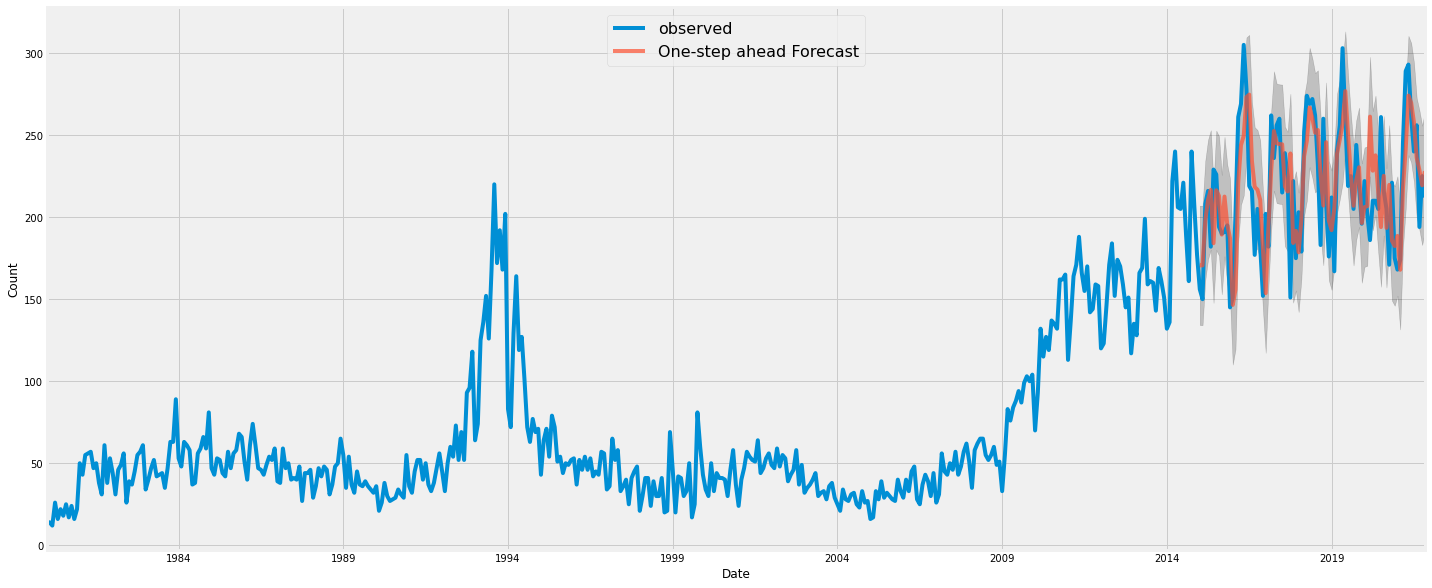

In [47]:
# 관측 데이터  1980년 부터 끝까지 
ax = df_in['in_count']['1980' : ].plot( label='observed', figsize=(22, 10) )

# 예측
pred.predicted_mean.plot(
    ax=ax,
    label='One-step ahead Forecast',
    alpha=.7
)

ax.fill_between(
    pred_ci.index,
    pred_ci['lower in_count'],
    pred_ci['upper in_count'],
    color='k',
    alpha=.2
)

ax.set_xlabel('Date')
ax.set_ylabel('Count')
plt.legend(loc=9, fontsize=16)

plt.show()

### get_prediction(dynamic=True)  - df_in
- 예측 데이터와 실제 데이터와의 비교 그래프
- 2015년 1월 이후부터 예측
- 1980년 부터 데이터부터 관측

In [48]:
pred = results.get_prediction(
    start=pd.to_datetime('2015-01-01'),
    dynamic=True
)

pred_ci = pred.conf_int()

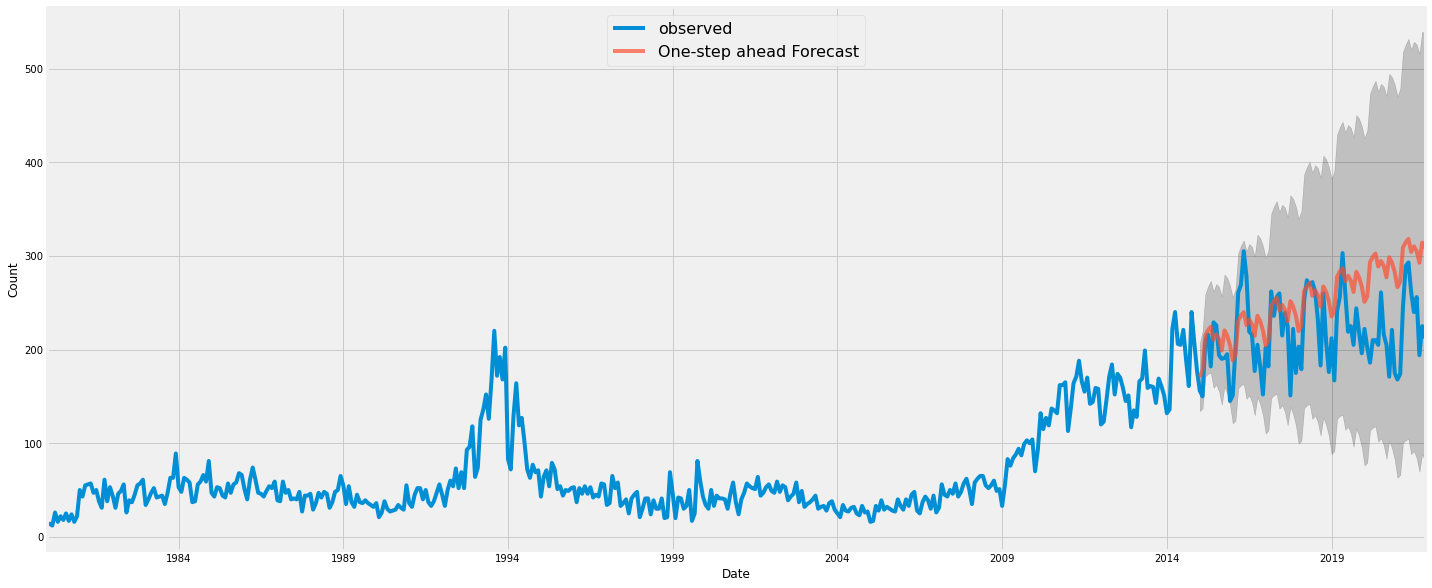

In [49]:
# 관측 데이터  1980년 부터 끝까지 
ax = df_in['in_count']['1980' : ].plot( label='observed', figsize=(22, 10) )

# 예측
pred.predicted_mean.plot(
    ax=ax,
    label='One-step ahead Forecast',
    alpha=.7
)

ax.fill_between(
    pred_ci.index,
    pred_ci['lower in_count'],
    pred_ci['upper in_count'],
    color='k',
    alpha=.2
)

ax.set_xlabel('Date')
ax.set_ylabel('Count')
plt.legend(loc=9, fontsize=16)

plt.show()

### 3 년간의 오픈 매장수 예측

In [50]:
# Get forecast some steps ahead in future
pred_uc = results.get_forecast(steps=36)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

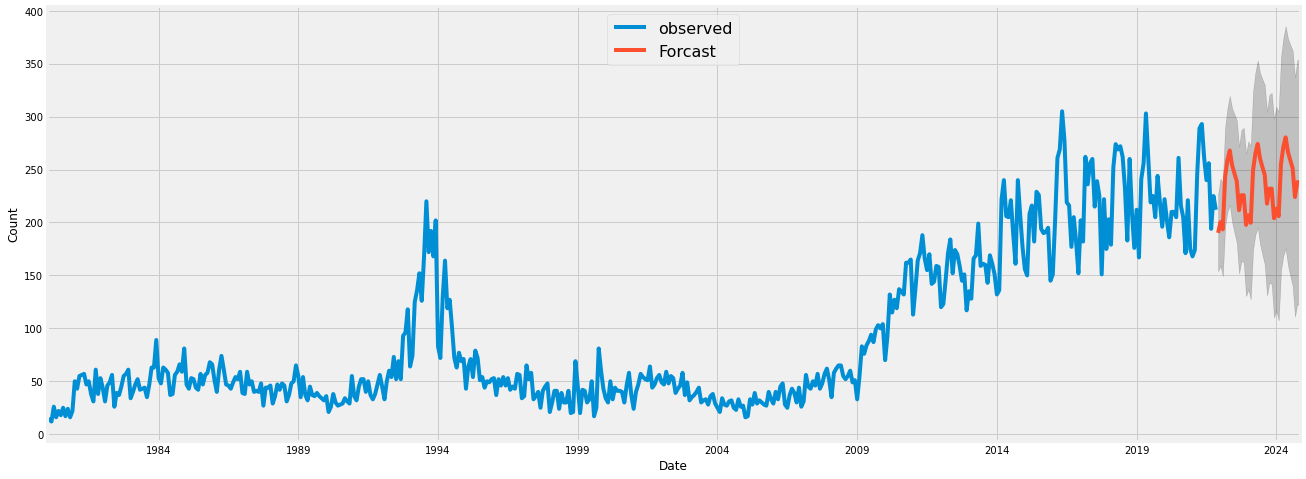

In [51]:
# 관측 데이터  1980년 부터 끝까지 
ax = df_in['in_count']['1980' : ].plot( label='observed', figsize=(20, 8) )

# 예측
pred_uc.predicted_mean.plot(
    ax=ax,
    label='Forcast'
)

ax.fill_between(
    pred_ci.index,
    pred_ci['lower in_count'],
    pred_ci['upper in_count'],
    color='k',
    alpha=.2
)


ax.set_xlabel('Date')
ax.set_ylabel('Count')
plt.legend(loc=9, fontsize=16)

plt.show()

### df_out 에 최적의 parameter 값 찾기

In [54]:
select_candi = 10000000
param_candi = ( 0, 0, 0 )
param_seasonal_candi = ( 0, 0, 0)

count=0
end_count = len(pdq)

for param in pdq:   
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX( df_out['out_count'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False
                                           )
            results = mod.fit()
            count += 1
            if count <= 5:
                print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            if results.aic < select_candi:
                select_candi = results.aic
                param_candi = param
                param_seasonal_candi = param_seasonal
        except:
            continue
            
print(param_candi, param_seasonal_candi, select_candi)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4742.193107255385
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4254.540768271858
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3597.1893000492482
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3489.4873267185553
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3603.273350169817
(0, 1, 1) (0, 1, 1, 12) 3250.4704654081434


In [55]:
mod = sm.tsa.statespace.SARIMAX(
    df_out['out_count'],
    order=(0, 1, 1),
    seasonal_order=(0, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = mod.fit()

print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          out_count   No. Observations:                  403
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1622.235
Date:                            Fri, 31 Dec 2021   AIC                           3250.470
Time:                                    14:33:24   BIC                           3262.259
Sample:                                05-01-1988   HQIC                          3255.150
                                     - 11-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7651      0.027    -28.185      0.000      -0.818      -0.712
ma.S.L12      -0.8682      0.031   

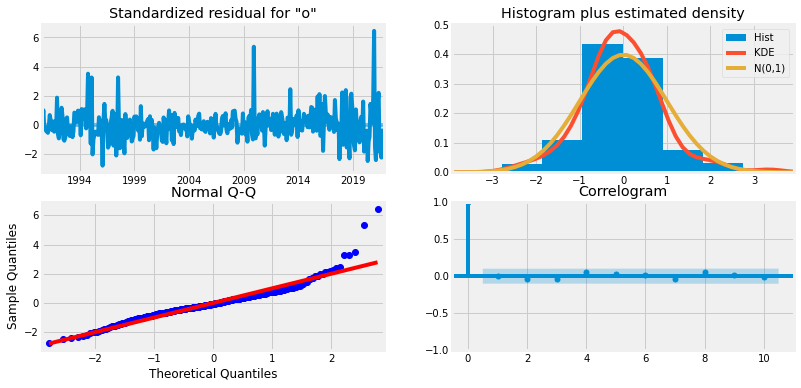

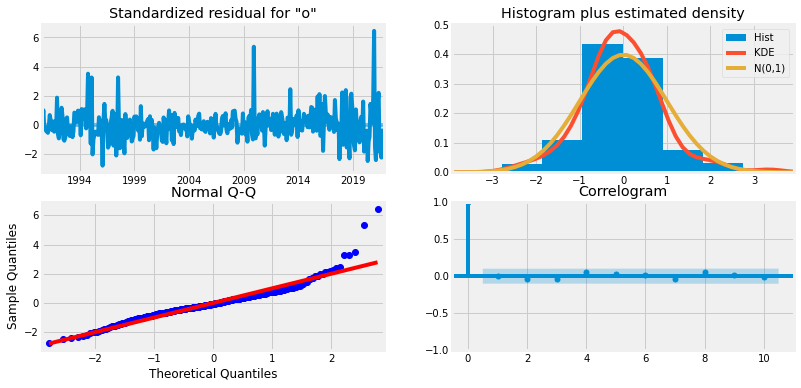

In [56]:
results.plot_diagnostics(figsize=(12,6))

### get_prediction(dynamic=False) - df_out
- 예측 데이터와 실제 데이터와의 비교 그래프
- 2015년 1월 이후부터 예측
- 1988년 부터 데이터부터 관측

In [57]:
pred = results.get_prediction(
    start=pd.to_datetime('2015-01-01'),
    dynamic=False
)

pred_ci = pred.conf_int()

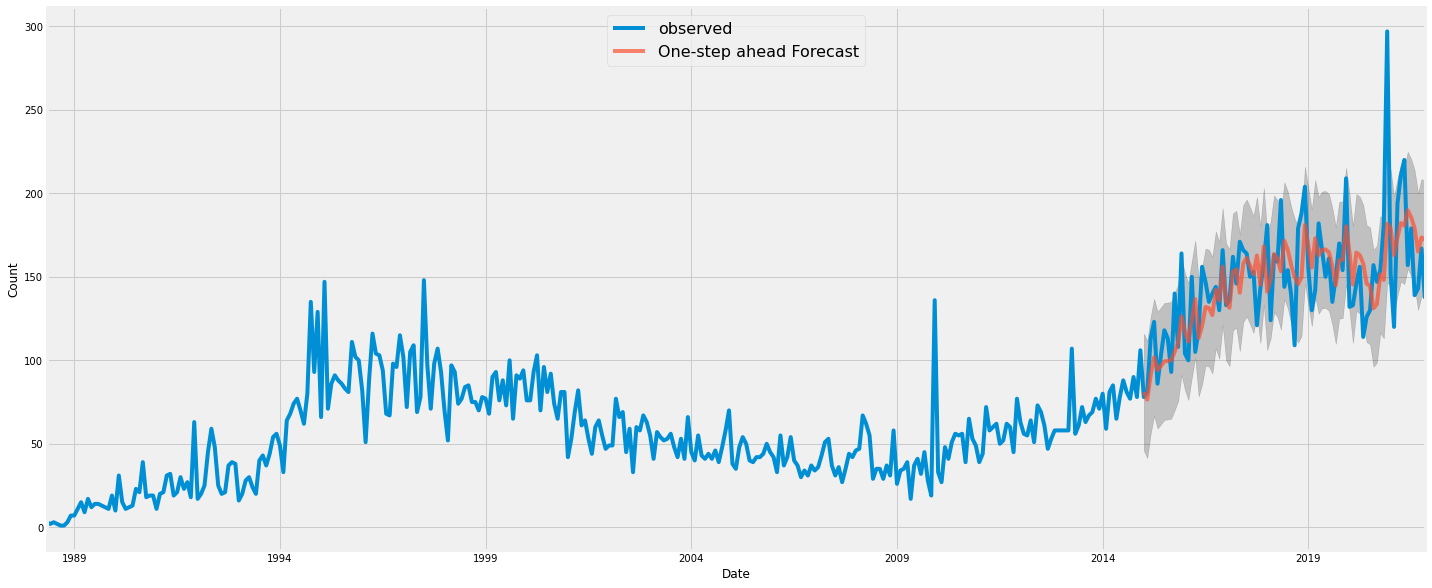

In [58]:
# 관측 데이터  1988년 부터 끝까지 
ax = df_out['out_count']['1988' : ].plot( label='observed', figsize=(22, 10) )

# 예측
pred.predicted_mean.plot(
    ax=ax,
    label='One-step ahead Forecast',
    alpha=.7
)

ax.fill_between(
    pred_ci.index,
    pred_ci['lower out_count'],
    pred_ci['upper out_count'],
    color='k',
    alpha=.2
)

ax.set_xlabel('Date')
ax.set_ylabel('Count')
plt.legend(loc=9, fontsize=16)

plt.show()

In [59]:
pred = results.get_prediction(
    start=pd.to_datetime('2015-01-01'),
    dynamic=True
)

pred_ci = pred.conf_int()

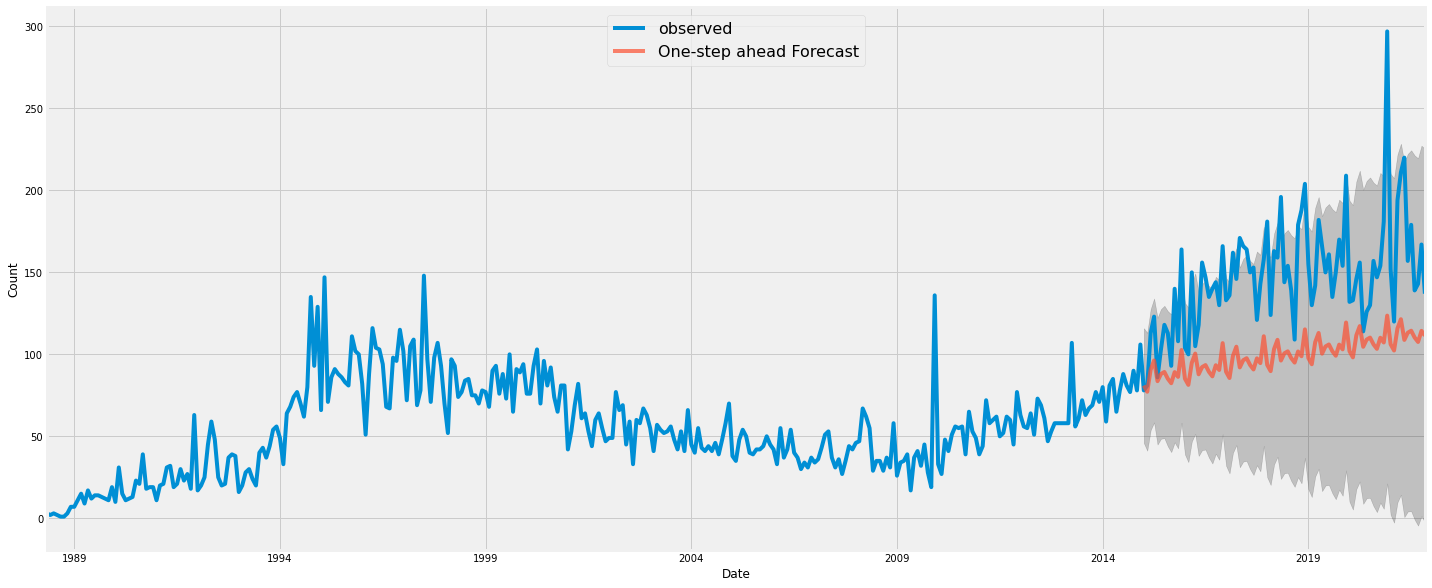

In [60]:
# 관측 데이터  1988년 부터 끝까지 
ax = df_out['out_count']['1988' : ].plot( label='observed', figsize=(22, 10) )

# 예측
pred.predicted_mean.plot(
    ax=ax,
    label='One-step ahead Forecast',
    alpha=.7
)

ax.fill_between(
    pred_ci.index,
    pred_ci['lower out_count'],
    pred_ci['upper out_count'],
    color='k',
    alpha=.2
)

ax.set_xlabel('Date')
ax.set_ylabel('Count')
plt.legend(loc=9, fontsize=16)

plt.show()

### 3 년간의 폐업 매장수 예측

In [173]:
# Get forecast some steps ahead in future
pred_uc = results.get_forecast(steps=36)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

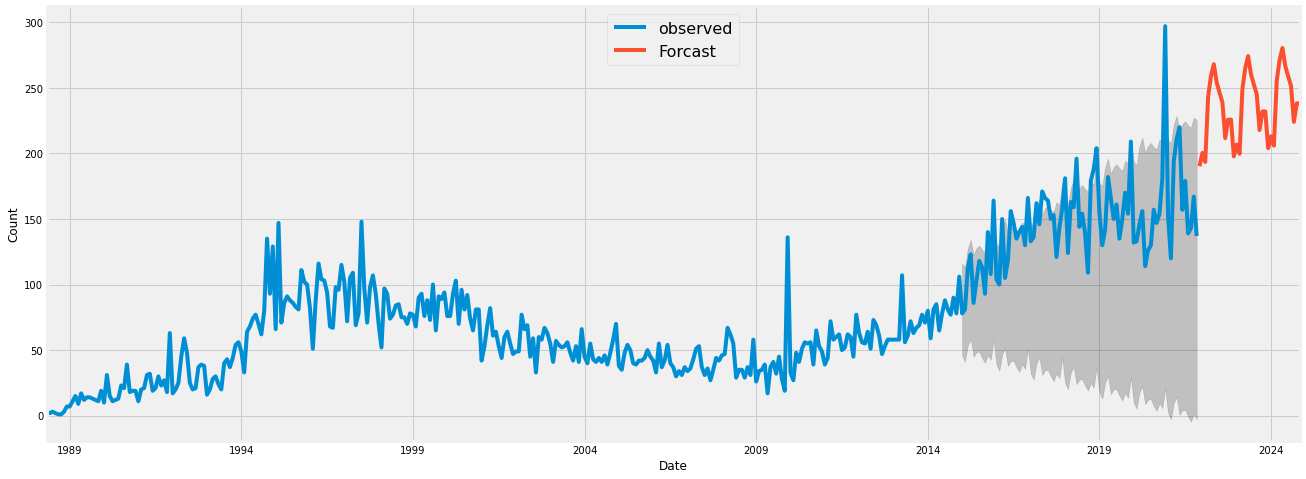

In [62]:
# 관측 데이터  1988년 부터 끝까지 
ax = df_out['out_count']['1988' : ].plot( label='observed', figsize=(20, 8) )

# 예측
pred_uc.predicted_mean.plot(
    ax=ax,
    label='Forcast'
)

ax.fill_between(
    pred_ci.index,
    pred_ci['lower out_count'],
    pred_ci['upper out_count'],
    color='k',
    alpha=.2
)


ax.set_xlabel('Date')
ax.set_ylabel('Count')
plt.legend(loc=9, fontsize=16)

plt.show()

In [63]:
df_inout = df.copy()

In [64]:
b = df_inout[df_inout['date'] == '2016-01-01'].index

In [65]:
b

Int64Index([432], dtype='int64')

In [66]:
a = (df_inout.iloc[:431]).index
df_inout.drop(a, axis=0, inplace=True)
df_inout

,in_count,out_count,date
431,145,164.0,2015-12-01
432,151,104.0,2016-01-01
433,202,100.0,2016-02-01
434,261,150.0,2016-03-01
435,269,105.0,2016-04-01
...,...,...,...
499,256,139.0,2021-08-01
500,194,143.0,2021-09-01
501,225,167.0,2021-10-01
502,212,137.0,2021-11-01


In [67]:
df_inout.reset_index()
df_inout

,in_count,out_count,date
431,145,164.0,2015-12-01
432,151,104.0,2016-01-01
433,202,100.0,2016-02-01
434,261,150.0,2016-03-01
435,269,105.0,2016-04-01
...,...,...,...
499,256,139.0,2021-08-01
500,194,143.0,2021-09-01
501,225,167.0,2021-10-01
502,212,137.0,2021-11-01


## 감성분석에 사용할 데이터 만들기 (자연어처리 관련)
- 오픈 숫자와 폐업 숫자의 평균을 이용하여 4단계로 분리
- 오픈_증감수(x) = 오픈수 - 오픈평균
- 폐업_증감수(y) = 폐업수 - 폐업평균
- x = +, y = + 일때 return 1
- x = +, y = - 일때 return 1
- x = -, y = + 일때 return 0
- x = -, y = - 일때 return 0

In [68]:
df_incount_mean = df_inout['in_count'].mean()
df_outcount_mean = df_inout['out_count'].mean()
print(df_incount_mean)
print(df_outcount_mean)

219.05479452054794
370.027397260274


In [69]:
df_inout['in_increase'] = df_inout['in_count'] - df_incount_mean
df_inout['out_increase'] = df_inout['out_count'] - df_outcount_mean
df_inout

,in_count,out_count,date,in_increase,out_increase
431,145,164.0,2015-12-01,-74.054795,-206.027397
432,151,104.0,2016-01-01,-68.054795,-266.027397
433,202,100.0,2016-02-01,-17.054795,-270.027397
434,261,150.0,2016-03-01,41.945205,-220.027397
435,269,105.0,2016-04-01,49.945205,-265.027397
...,...,...,...,...,...
499,256,139.0,2021-08-01,36.945205,-231.027397
500,194,143.0,2021-09-01,-25.054795,-227.027397
501,225,167.0,2021-10-01,5.945205,-203.027397
502,212,137.0,2021-11-01,-7.054795,-233.027397


In [70]:
df_inout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 431 to 503
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   in_count      73 non-null     int64         
 1   out_count     73 non-null     float64       
 2   date          73 non-null     datetime64[ns]
 3   in_increase   73 non-null     float64       
 4   out_increase  73 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 3.4 KB


In [71]:
def increase(x, y):
    if (x > 0 and y > 0):
        return 1
    elif (x > 0 and y < 0):
        return 1
    elif (x < 0 and y > 0):
        return 0
    else:
        return 0

In [72]:
df_inout['emo'] = df_inout.apply(lambda x: increase(x['in_increase'], x['out_increase']), axis=1)
df_inout

,in_count,out_count,date,in_increase,out_increase,emo
431,145,164.0,2015-12-01,-74.054795,-206.027397,0
432,151,104.0,2016-01-01,-68.054795,-266.027397,0
433,202,100.0,2016-02-01,-17.054795,-270.027397,0
434,261,150.0,2016-03-01,41.945205,-220.027397,1
435,269,105.0,2016-04-01,49.945205,-265.027397,1
...,...,...,...,...,...,...
499,256,139.0,2021-08-01,36.945205,-231.027397,1
500,194,143.0,2021-09-01,-25.054795,-227.027397,0
501,225,167.0,2021-10-01,5.945205,-203.027397,1
502,212,137.0,2021-11-01,-7.054795,-233.027397,0


In [73]:
(df_inout['emo'] == 1).value_counts()

False    39
True     34
Name: emo, dtype: int64

In [74]:
(df_inout['emo'] == 0).value_counts()

True     39
False    34
Name: emo, dtype: int64

## 1990년 이후 현재 오픈중인 매장수
- 1980년 이전 데이터는 삭제
- 그래프는 1990년도부터 그리고 1980년도 부터 숫자를 포함
- 월별 그래프 및 년도별 그래프 그리기

In [75]:
df

,in_count,out_count,date
0,14,NaN,1980-01-01
1,14,1.0,1980-02-01
2,12,NaN,1980-03-01
3,26,NaN,1980-04-01
4,16,NaN,1980-05-01
...,...,...,...
499,256,139.0,2021-08-01
500,194,143.0,2021-09-01
501,225,167.0,2021-10-01
502,212,137.0,2021-11-01


In [76]:
df[df['date'] == '1990-01-01'].index

Int64Index([120], dtype='int64')

In [77]:
df = df.fillna(0)
df

,in_count,out_count,date
0,14,0.0,1980-01-01
1,14,1.0,1980-02-01
2,12,0.0,1980-03-01
3,26,0.0,1980-04-01
4,16,0.0,1980-05-01
...,...,...,...
499,256,139.0,2021-08-01
500,194,143.0,2021-09-01
501,225,167.0,2021-10-01
502,212,137.0,2021-11-01


In [78]:
df['in_open']= 0

In [79]:
for i in range(len(df.index)):
    if 0 < i :
        df.loc[i, 'in_open'] = df.iloc[i-1]['in_open'] + (df.iloc[i]['in_count'] - df.iloc[i]['out_count'])
    else :
        pass

df

,in_count,out_count,date,in_open
0,14,0.0,1980-01-01,0
1,14,1.0,1980-02-01,13
2,12,0.0,1980-03-01,25
3,26,0.0,1980-04-01,51
4,16,0.0,1980-05-01,67
...,...,...,...,...
499,256,139.0,2021-08-01,15671
500,194,143.0,2021-09-01,15722
501,225,167.0,2021-10-01,15780
502,212,137.0,2021-11-01,15855


In [80]:
drop_a = df[df.index < 120].index
drop_a

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            110, 111, 112, 113, 114, 115, 116, 117, 118, 119],
           dtype='int64', length=120)

In [81]:
df.drop(index = drop_a, inplace=True)
df

,in_count,out_count,date,in_open
120,36,10.0,1990-01-01,5210
121,21,31.0,1990-02-01,5200
122,26,15.0,1990-03-01,5211
123,38,11.0,1990-04-01,5238
124,30,12.0,1990-05-01,5256
...,...,...,...,...
499,256,139.0,2021-08-01,15671
500,194,143.0,2021-09-01,15722
501,225,167.0,2021-10-01,15780
502,212,137.0,2021-11-01,15855


In [82]:
df_open = df.copy()
df_open = df_open.set_index('date')
df_open

,in_count,out_count,in_open
date,,,
1990-01-01,36,10.0,5210
1990-02-01,21,31.0,5200
1990-03-01,26,15.0,5211
1990-04-01,38,11.0,5238
1990-05-01,30,12.0,5256
...,...,...,...
2021-08-01,256,139.0,15671
2021-09-01,194,143.0,15722
2021-10-01,225,167.0,15780


In [83]:
df_open.drop('2021-12-01', axis=0, inplace=True)
df_open

,in_count,out_count,in_open
date,,,
1990-01-01,36,10.0,5210
1990-02-01,21,31.0,5200
1990-03-01,26,15.0,5211
1990-04-01,38,11.0,5238
1990-05-01,30,12.0,5256
...,...,...,...
2021-07-01,240,179.0,15554
2021-08-01,256,139.0,15671
2021-09-01,194,143.0,15722


In [84]:
df_open['in_open'] = df_open['in_open'].astype('int64')
df_open

,in_count,out_count,in_open
date,,,
1990-01-01,36,10.0,5210
1990-02-01,21,31.0,5200
1990-03-01,26,15.0,5211
1990-04-01,38,11.0,5238
1990-05-01,30,12.0,5256
...,...,...,...
2021-07-01,240,179.0,15554
2021-08-01,256,139.0,15671
2021-09-01,194,143.0,15722


### 월별 데이터를 사용한 오픈중인 매장수 그리기

In [85]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

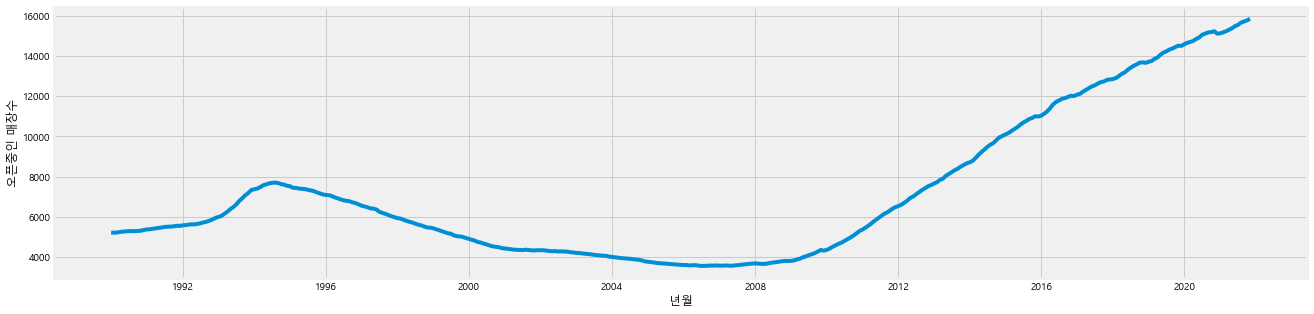

In [86]:
fig = plt.figure(figsize=(20,5))
plt.plot(df_open.index, df_open['in_open'])
plt.xlabel('년월')
plt.ylabel('오픈중인 매장수')
plt.show()

### 월별 데이터를 사용하여 오픈/폐업 한 매장수 그리기

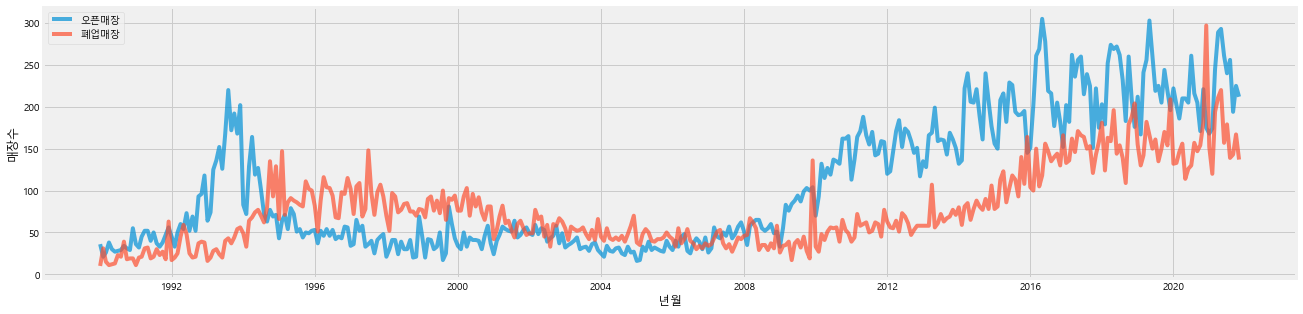

In [87]:
fig = plt.figure(figsize=(20,5))
plt.plot(df_open.index, df_open['in_count'], alpha=0.7)
plt.plot(df_open.index, df_open['out_count'], alpha=0.7)
plt.xlabel('년월')
plt.ylabel('매장수')
plt.legend(['오픈매장','폐업매장'])
plt.show()

In [88]:
df_open = df_open.reset_index()
df_open

,date,in_count,out_count,in_open
0,1990-01-01,36,10.0,5210
1,1990-02-01,21,31.0,5200
2,1990-03-01,26,15.0,5211
3,1990-04-01,38,11.0,5238
4,1990-05-01,30,12.0,5256
...,...,...,...,...
378,2021-07-01,240,179.0,15554
379,2021-08-01,256,139.0,15671
380,2021-09-01,194,143.0,15722
381,2021-10-01,225,167.0,15780


In [89]:
df_open['month']=df_open['date'].dt.month
df_open['year']=df_open['date'].dt.year
df_open

,date,in_count,out_count,in_open,month,year
0,1990-01-01,36,10.0,5210,1,1990
1,1990-02-01,21,31.0,5200,2,1990
2,1990-03-01,26,15.0,5211,3,1990
3,1990-04-01,38,11.0,5238,4,1990
4,1990-05-01,30,12.0,5256,5,1990
...,...,...,...,...,...,...
378,2021-07-01,240,179.0,15554,7,2021
379,2021-08-01,256,139.0,15671,8,2021
380,2021-09-01,194,143.0,15722,9,2021
381,2021-10-01,225,167.0,15780,10,2021


In [90]:
df_inopen = df_open[df_open['month'] == 11]
df_inopen

,date,in_count,out_count,in_open,month,year
10,1990-11-01,29,19.0,5301,11,1990
22,1991-11-01,47,18.0,5546,11,1991
34,1992-11-01,96,39.0,5860,11,1992
46,1993-11-01,168,54.0,7181,11,1993
58,1994-11-01,69,93.0,7598,11,1994
70,1995-11-01,49,102.0,7159,11,1995
82,1996-11-01,57,96.0,6672,11,1996
94,1997-11-01,45,107.0,6022,11,1997
106,1998-11-01,21,70.0,5463,11,1998
118,1999-11-01,60,89.0,4989,11,1999


In [91]:
df_inopen = df_inopen.set_index('date')
df_inopen

,in_count,out_count,in_open,month,year
date,,,,,
1990-11-01,29,19.0,5301,11,1990
1991-11-01,47,18.0,5546,11,1991
1992-11-01,96,39.0,5860,11,1992
1993-11-01,168,54.0,7181,11,1993
1994-11-01,69,93.0,7598,11,1994
1995-11-01,49,102.0,7159,11,1995
1996-11-01,57,96.0,6672,11,1996
1997-11-01,45,107.0,6022,11,1997
1998-11-01,21,70.0,5463,11,1998


### 년도별 데이터를 사용한 운영중인 매장수 그리기

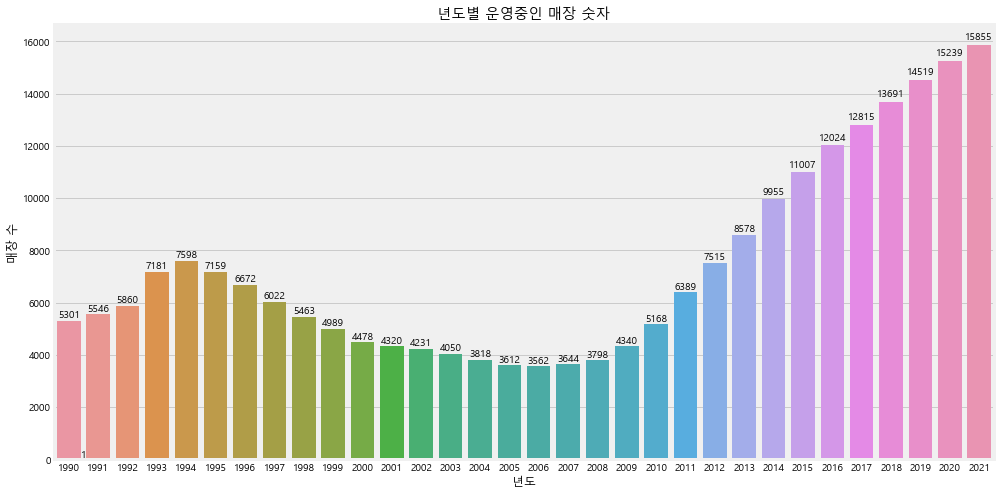

In [92]:
plt.figure(figsize = (15,8))

ax = sns.barplot(data=df_inopen, x="year", y="in_open")
plt.xlabel("년도")
plt.ylabel("매장 수")
plt.title("년도별 운영중인 매장 숫자")

bars = [rect for rect in ax.get_children() if isinstance(rect, mpl.patches.Rectangle)]

for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, 1.01*height, f'{height:.0f}', ha='center', va='bottom')